In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
! pwd

/Users/intaewoo/Downloads


In [3]:
cd Users/

[Errno 2] No such file or directory: 'Users/'
/Users/intaewoo/Downloads


In [4]:
titanic_df = pd.read_csv('titanic_train.csv')

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df['Age'].isnull().sum()

177

In [7]:
titanic_df['Cabin'].isnull().sum()

687

In [8]:
titanic_df['Embarked'].isnull().sum()

2

In [9]:
# NULL처리

titanic_df['Age'].fillna(titanic_df['Age'].mean() , inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace = True)

# 모든 칼럼의 null 값을 합산해서 NULL 값이 없는지 확인
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
# 문자열 피처(sex, cabin, embarked) 값 분류 확인
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
E77              1
F E69            1
D45              1
C45              1
T                1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [11]:
# cabin 값을 선실 등급만으로 표기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [12]:
#선실 등급 별 개수 확인
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
# 성별(sex) 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

# 성별에 따른 생존자 수 분포
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [14]:
# 성별, 생존 확인
# 사망 : 0
# 생존 : 1

titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

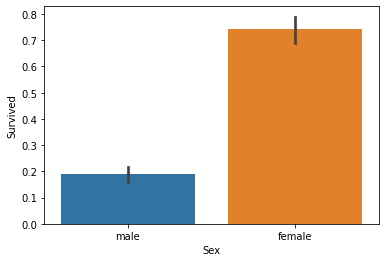

In [15]:
# 성별 생존자 : 막대그래프(barplot)
sns.barplot(x='Sex',y='Survived',data =titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

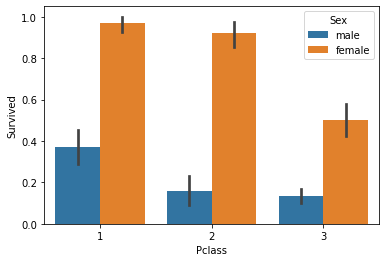

In [16]:
# 객실 등급별/성별 생존확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [17]:
from sklearn import preprocessing

# 레이블 인코딩 함수
def encode_features(dataDF):
    # 문자열 카테고리 피처
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [18]:
# 데이터 전처리 : 삭제
# 불필요한 변수 제거 drop()함수

titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [19]:
from sklearn.preprocessing import LabelBinarizer

#null 값 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
# 머신러닝 알고리즘애 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df[Cabin].str[:1] #첫 문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설명한 data preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [20]:
titandic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

In [22]:
# 생존자 예측 프로세스
#X_titanic_df = transform_features(X_titanic_df)


In [23]:
#학습/테스트 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#결정트리, 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도 : {0:.4}'.format(accuracy_score(y_test,dt_pred)))

#랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트의 정확도 : {0:.4}'.format(accuracy_score(y_test,rf_pred)))

#로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀의 정확도 : {0:.4}'.format(accuracy_score(y_test,lr_pred)))



결정트리의 정확도 : 0.7877
랜덤포레스트의 정확도 : 0.8547
로지스틱회귀의 정확도 : 0.8492


/opt/anaconda3/envs/multi/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# 교차 검증을 통한 모델 성능 향상
from sklearn.model_selection import KFold

In [ ]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print('교차검증 {0} : {1}'.format(iter_n, accuracy))
    
    mean_accuracy = np.mean(scores)
    print('평균 정확도 : {0}'.format(mean_accuracy))
    
exec_kfold(dt_clf,folds=5)
        
            

In [ ]:
# 참고 : 피처 데이터 세트 확인
X_titanic_df.head(3)

In [ ]:
# index 값 출력
X_titanic_df.values[0]

In [ ]:
# cross_val_score()를 이용한 교차 겸증 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df,cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차검증 {0} , 정확도 : {1:.4f}'.format(iter_n,accuracy))
print('평균 정확도 : {0:.4}'.format(np.mean(scores)))

In [ ]:
from sklearn.model_selection import GridSearchCV
# 하이퍼 파라미터 설정
parameters = {'max_depth' :[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf' :[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train,y_train)
print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i]==1 :
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

In [ ]:
# 타이타닉 생존자 예측
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)
